In [3]:
import  tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.models import Sequential


In [6]:
data, info = tfds.load("tf_flowers", with_info=True, as_supervised=True)
train_data = data['train'].map(lambda x, y: (tf.image.resize(x, (128,128))/255.0, y)).shuffle(1000).batch(32)
test_data = train_data.take(100)

In [7]:

num_classes = info.features['label'].num_classes
class_names = info.features['label'].names

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9979 - loss: 0.0278 - val_accuracy: 0.9987 - val_loss: 0.0211
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9994 - loss: 0.0182 - val_accuracy: 0.9981 - val_loss: 0.0214
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9971 - loss: 0.0217 - val_accuracy: 0.9994 - val_loss: 0.0121
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9996 - loss: 0.0102 - val_accuracy: 0.9991 - val_loss: 0.0125
Epoch 5/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9993 - loss: 0.0129 - val_accuracy: 0.9997 - val_loss: 0.0086


In [13]:
loss, accuracy = model.evaluate(test_data)
print("\nTest Accuracy:", accuracy)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9996 - loss: 0.0092

Test Accuracy: 0.9996874928474426


In [16]:
import numpy as np
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

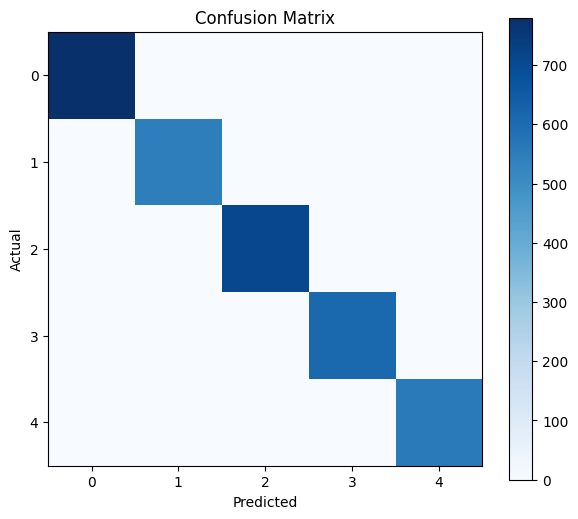

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


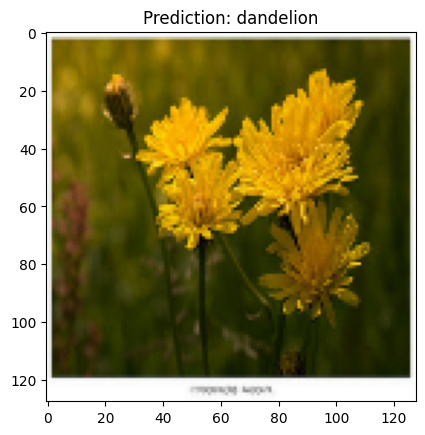

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Prediction example
for img, label in test_data.take(1):
    pred = model.predict(img)
    plt.imshow(img[0])
    plt.title(f"Prediction: {class_names[np.argmax(pred[0])]}")
    plt.show()